Goh Jie Min Jamie, 202332158, jamiegoh@ajou.ac.kr

In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [301]:
trainingData = pd.read_csv('pisa2009train.csv')
testingData = pd.read_csv('pisa2009test.csv')

trainingData.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
0,11,1,NaN,NaN,0.0,NaN,NaN,1.0,NaN,NaN,...,0.0,1.0,0.0,225.0,NaN,1.0,1,1,673.0,476.00
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
2,9,1,White,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,1.0,1.0,0.0,250.0,28.0,1.0,1,0,1233.0,554.81
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89


In [302]:
#A1. Summarize the data set with descriptive statistics and others: e.g., the number of all the students, averages of the variables, correlations between the variables, etc. (10 points)

trainingData.describe()

#The data set has a total of 3663 students. 
# The average of the variables are as follows: math score = 477.5, reading score = 497.5, science score = 493.5, and the average of the total score is 1468.5. 



,grade,male,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,fatherWork,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
count,3663.000000,3663.000000,3607.000000,3601.000000,3566.000000,3266.000000,3570.000000,3418.000000,3094.000000,3430.000000,...,3592.000000,3598.000000,3629.000000,3477.000000,3414.000000,3520.000000,3663.000000,3663.000000,3501.000000,3663.000000
mean,10.089817,0.511057,0.722761,0.785893,0.879978,0.348132,0.734454,0.859274,0.331933,0.853061,...,0.871659,0.899389,0.289887,266.208225,24.499414,0.967614,0.933934,0.384930,1369.316767,497.911403
std,0.554375,0.499946,0.447697,0.410259,0.325033,0.476451,0.441685,0.347789,0.470983,0.354096,...,0.334515,0.300855,0.453772,148.403525,7.184348,0.177049,0.248431,0.486645,869.983618,95.515153
min,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,100.000000,168.550000
25%,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,225.000000,20.000000,1.000000,1.000000,0.000000,712.000000,431.705000
50%,10.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,250.000000,25.000000,1.000000,1.000000,0.000000,1212.000000,499.660000
75%,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,300.000000,30.000000,1.000000,1.000000,1.000000,1900.000000,566.230000
max,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2400.000000,75.000000,1.000000,1.000000,1.000000,6694.000000,746.000000


<AxesSubplot:>

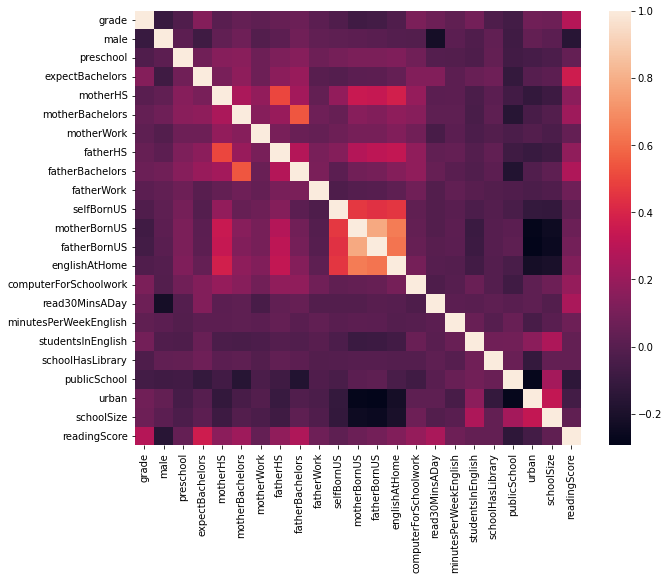

In [303]:
#The correlation between variables is illustrated in the heatmap below.

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(trainingData.corr())



In [304]:
#Clean up NaN 
trainingData = trainingData.dropna()
testingData = testingData.dropna()


trainingData.head()

,grade,male,raceeth,preschool,expectBachelors,motherHS,motherBachelors,motherWork,fatherHS,fatherBachelors,...,englishAtHome,computerForSchoolwork,read30MinsADay,minutesPerWeekEnglish,studentsInEnglish,schoolHasLibrary,publicSchool,urban,schoolSize,readingScore
1,11,1,White,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,450.0,25.0,1.0,1,0,1173.0,575.01
3,10,0,Black,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,200.0,23.0,1.0,1,1,2640.0,458.11
4,10,1,Hispanic,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,250.0,35.0,1.0,1,1,1095.0,613.89
7,10,0,White,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,1.0,300.0,30.0,1.0,1,0,1913.0,439.36
9,10,1,More than one race,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,294.0,24.0,1.0,1,0,899.0,465.90


In [305]:
#Create dummy variables for the "raceeth" variable, with "White" as the reference category

raceethDummies = pd.get_dummies(trainingData['raceeth'], prefix='raceeth')
raceethDummies = raceethDummies.drop('raceeth_White', axis=1)

gradeDummies = pd.get_dummies(trainingData['grade'], prefix='grade')
gradeDummies = gradeDummies.drop('grade_10', axis=1)


#Concatenate the dummy variables to the original
trainingDataWithDummy = pd.concat([trainingData, raceethDummies], axis=1)
trainingDataWithDummy = pd.concat([trainingDataWithDummy, gradeDummies], axis=1)
trainingDataWithDummy = trainingDataWithDummy.drop(['grade','raceeth'], axis=1)

trainingDataWithDummy.head()
trainingDataWithDummy.columns

Index(['male', 'preschool', 'expectBachelors', 'motherHS', 'motherBachelors',
       'motherWork', 'fatherHS', 'fatherBachelors', 'fatherWork', 'selfBornUS',
       'motherBornUS', 'fatherBornUS', 'englishAtHome',
       'computerForSchoolwork', 'read30MinsADay', 'minutesPerWeekEnglish',
       'studentsInEnglish', 'schoolHasLibrary', 'publicSchool', 'urban',
       'schoolSize', 'readingScore', 'raceeth_American Indian/Alaska Native',
       'raceeth_Asian', 'raceeth_Black', 'raceeth_Hispanic',
       'raceeth_More than one race',
       'raceeth_Native Hawaiian/Other Pacific Islander', 'grade_8', 'grade_9',
       'grade_11', 'grade_12'],
      dtype='object')

In [306]:
trainingDataWithDummy.columns

independentVariableColumns = ['male', 'preschool', 'expectBachelors', 'motherHS', 'motherBachelors',
       'motherWork', 'fatherHS', 'fatherBachelors', 'fatherWork', 'selfBornUS',
       'motherBornUS', 'fatherBornUS', 'englishAtHome',
       'computerForSchoolwork', 'read30MinsADay', 'minutesPerWeekEnglish',
       'studentsInEnglish', 'schoolHasLibrary', 'publicSchool', 'urban',
       'schoolSize', 'raceeth_American Indian/Alaska Native',
       'raceeth_Asian', 'raceeth_Black', 'raceeth_Hispanic',
       'raceeth_More than one race',
       'raceeth_Native Hawaiian/Other Pacific Islander', 'grade_8', 'grade_9',
       'grade_11', 'grade_12']

independentVariables = trainingDataWithDummy[independentVariableColumns]
dependentVariable = trainingDataWithDummy[['readingScore']]



In [307]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(independentVariables, dependentVariable)

LinearRegression()

In [308]:
print(lm.intercept_)
print(lm.coef_)
coefficients = pd.DataFrame(lm.coef_[0], independentVariables.columns)
coefficients.columns = ['Coefficient']
coefficients

[448.3694554]
[[-1.41858679e+01 -5.71795951e+00  5.44768154e+01  6.38444044e+00
   1.26252669e+01 -3.13570807e+00  3.25297937e+00  1.68816746e+01
   4.99010843e+00 -4.76516914e+00 -9.52618661e+00  4.06602131e+00
   8.78029502e+00  2.17134760e+01  3.47558582e+01  1.20990048e-02
  -3.11820207e-01  1.19076181e+01 -1.65790764e+01  4.00806915e-01
   6.52799137e-03 -6.80893962e+01 -3.50968375e+00 -6.64605454e+01
  -3.79100566e+01 -1.57078903e+01 -3.94408571e+00 -8.95609523e+01
  -5.31351167e+01  1.74331670e+01  7.76567282e+01]]


,Coefficient
male,-14.185868
preschool,-5.717960
expectBachelors,54.476815
motherHS,6.384440
motherBachelors,12.625267
motherWork,-3.135708
fatherHS,3.252979
fatherBachelors,16.881675
fatherWork,4.990108
selfBornUS,-4.765169


The key explainers are the following: 
if the student either expects a bachelors degree, reads 30 minutes a day or is in grade 12, they have the highest positive correlation with reading scores.
expectBachelors	is associated with a +54.476815 to readingScore, read30MinsADay	is associated with a +34.755858 to readingScore and grade_12 is associated with a +77.656728 readingScore.
if the student either is American Indian/Alaska Native or Black or is in grade 8, they have the highest negative correlation with reading scores.
raceeth_American Indian/Alaska Native is associated with a -68.089396 to readingScore, raceeth_Black is associated with a -66.460545 to readingScore and grade_8 is associated with a -89.560952 to readingScore

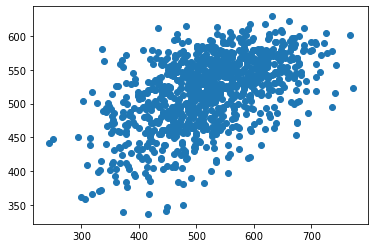

In [309]:
#Create dummy variables for the "raceeth" variable, with "White" as the reference category

raceethDummies = pd.get_dummies(testingData['raceeth'], prefix='raceeth')
raceethDummies = raceethDummies.drop('raceeth_White', axis=1)

gradeDummies = pd.get_dummies(testingData['grade'], prefix='grade')
gradeDummies = gradeDummies.drop('grade_10', axis=1)


#Concatenate the dummy variables to the original
testingDataWithDummy = pd.concat([testingData, raceethDummies], axis=1)
testingDataWithDummy = pd.concat([testingDataWithDummy, gradeDummies], axis=1)
testingDataWithDummy = testingDataWithDummy.drop(['grade','raceeth'], axis=1)

testingDataWithDummy.head()
testingDataWithDummy.columns

#add grade 8 column to testing data
testingDataWithDummy['grade_8'] = 0
predictions = lm.predict(testingDataWithDummy[independentVariableColumns])

plt.scatter(testingDataWithDummy['readingScore'],predictions)

In [310]:

y_test1=testingDataWithDummy['readingScore'].to_frame()
y_test1['Predictions']=predictions
y_test1.head()

,readingScore,Predictions
0,355.24,476.199225
4,453.50,543.058264
6,405.13,433.376128
7,665.05,502.123794
8,604.84,556.340963


In [311]:
y_test1['Error']=y_test1['Predictions']-y_test1['readingScore']
y_test1.head()

,readingScore,Predictions,Error
0,355.24,476.199225,120.959225
4,453.50,543.058264,89.558264
6,405.13,433.376128,28.246128
7,665.05,502.123794,-162.926206
8,604.84,556.340963,-48.499037


In [312]:
MSE=(sum(y_test1['Error']**2))/len(y_test1['Error'])
print(MSE)
     
MAE=(sum(y_test1['Error'].abs()))/len(y_test1['Error'])
print(MAE)

5769.205451227339
59.94745229071358


In [313]:
from sklearn import metrics

In [314]:
print('MAE:', metrics.mean_absolute_error(testingDataWithDummy['readingScore'], predictions))
print('MSE:', metrics.mean_squared_error(testingDataWithDummy['readingScore'], predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(testingDataWithDummy['readingScore'], predictions)))

MAE: 59.947452290713606
MSE: 5769.205451227341
RMSE: 75.95528586759015


Logistic Regression:

In [315]:

kickstarterData = pd.read_csv('ks-projects-201612.csv', encoding='ISO-8859-14')

kickstarterData = kickstarterData.drop(columns = ['Unnamed: 13', "Unnamed: 14","Unnamed: 15","Unnamed: 16" ])

kickstarterData.columns = kickstarterData.columns.str.strip()

kickstarterData.head()


/Users/jamiegoh/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375


<AxesSubplot:>

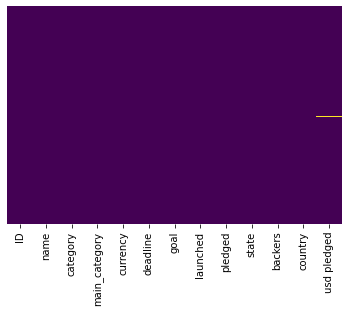

In [316]:
sns.heatmap(kickstarterData.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [317]:
#Since theres only 1 null value in the column, we can drop it instead of averaging it out
kickstarterData = kickstarterData.dropna()


<AxesSubplot:>

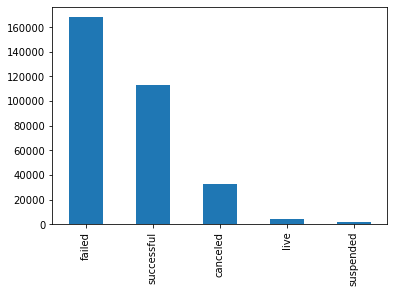

In [318]:
# Visualise distributions of continuous variables and compositions of categorical variables 
# (e.g., the number of successful projects in each category, the number of projects in each country, etc.) (10 points)

#Remove all rows that have a state other than "successful" or "failed" or "canceled" or "suspended" or "live"
kickstarterData = kickstarterData[kickstarterData['state'].isin(['successful', 'failed', 'canceled', 'suspended', 'live'])]

kickstarterData['state'].value_counts().plot(kind='bar')


<AxesSubplot:>

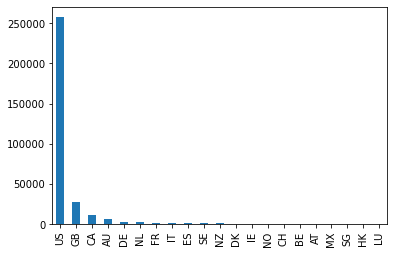

In [319]:
#PLot a graph of the number of projects in each country
kickstarterData['country'].value_counts().plot(kind='bar')

<AxesSubplot:>

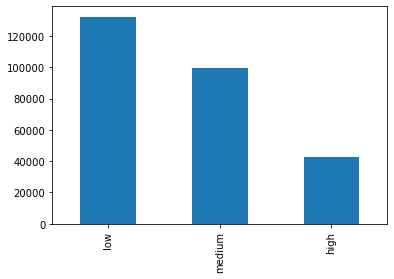

In [320]:
#Plot a graph of the number of projects in each category

kickstarterData['pledged'] = kickstarterData['pledged'].replace('[\$,]', '', regex=True).astype(float)
pd.cut(kickstarterData['pledged'], bins=[0, 1000, 10000, 100000000], labels=['low', 'medium', 'high']).value_counts().plot(kind='bar')



In [321]:
#Generate dummies for the main category variable
mainCategoryDummies = pd.get_dummies(kickstarterData['main_category'], prefix='main_category')
mainCategoryDummies = mainCategoryDummies.drop('main_category_Film & Video', axis=1)

#Append the dummies to the original dataframe
kickstarterDataWithDummy = pd.concat([kickstarterData, mainCategoryDummies], axis=1)


#Generate dummies for the category variable
categoryDummies = pd.get_dummies(kickstarterData['category'], prefix='category')
categoryDummies = categoryDummies.drop('category_Product Design', axis=1)

#Append the dummies to the original dataframe
kickstarterDataWithDummy = pd.concat([kickstarterDataWithDummy, categoryDummies], axis=1)

#Drop the original main category and category variables
kickstarterDataWithDummy = kickstarterDataWithDummy.drop(['main_category','category'], axis=1)




In [322]:
#Drop all rows where state is not "successful" or "failed"
kickstarterDataWithDummy = kickstarterDataWithDummy[kickstarterDataWithDummy['state'].isin(['successful', 'failed'])]

#Generate dummies for the state variable
stateDummies = pd.get_dummies(kickstarterDataWithDummy['state'], prefix='state')
stateDummies = stateDummies.drop('state_failed', axis=1)

#Append the dummies to the original dataframe
kickstarterDataWithDummy = pd.concat([kickstarterDataWithDummy, stateDummies], axis=1)

#Drop the original state variable
kickstarterDataWithDummy = kickstarterDataWithDummy.drop('state', axis=1)
kickstarterDataWithDummy.head()

,ID,name,currency,deadline,goal,launched,pledged,backers,country,usd pledged,...,category_Weaving,category_Web,category_Webcomics,category_Webseries,category_Woodworking,category_Workshops,category_World Music,category_Young Adult,category_Zines,state_successful
0,1000002330,The Songs of Adelaide & Abullah,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0.0,0,GB,0,...,0,0,0,0,0,0,0,0,0,0
1,1000004038,Where is Hank?,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220.0,3,US,220,...,0,0,0,0,0,0,0,0,0,0
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1.0,1,US,1,...,0,0,0,0,0,0,0,0,0,0
4,1000014025,Monarch Espresso Bar,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375.0,224,US,52375,...,0,0,0,0,0,0,0,0,0,1
5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,USD,2014-12-21 18:30:44,1000,2014-12-01 18:30:44,1205.0,16,US,1205,...,0,0,0,0,0,0,0,0,0,1


In [323]:
#Drop irrelevant columns
kickstarterDataWithDummy = kickstarterDataWithDummy.drop(['currency','name','country','ID','deadline','launched','pledged','usd pledged'], axis=1)

kickstarterDataWithDummy = kickstarterDataWithDummy.dropna()



In [324]:
from sklearn.model_selection import train_test_split

In [325]:


X_train, X_test, y_train, y_test = train_test_split(kickstarterDataWithDummy.drop('state_successful',axis=1), 
                                                    kickstarterDataWithDummy['state_successful'], test_size=0.30, 
                                                    random_state=101)

In [326]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [327]:
predictions = logmodel.predict(X_test)
probs = logmodel.predict_proba(X_test)

In [328]:
from sklearn.metrics import confusion_matrix

In [329]:
print(confusion_matrix(y_test,predictions))

[[44519  5923]
 [ 2054 31831]]


In [330]:
from sklearn.metrics import classification_report

In [331]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92     50442
           1       0.84      0.94      0.89     33885

    accuracy                           0.91     84327
   macro avg       0.90      0.91      0.90     84327
weighted avg       0.91      0.91      0.91     84327



In [332]:
from sklearn.metrics import roc_curve, auc

In [333]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5, 0, 'False Positive Rate')

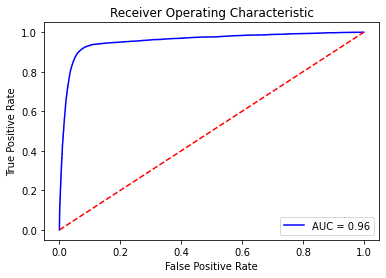

In [334]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

To improve predictions with more accuracy and precision, we can utilise feature engineering to the dataset. We should consider selecting the most important features that have the highest correlation with the target variable. We can also consider removing features that have a low correlation with the target variable. This will help us to improve the accuracy of the model and reduce the risk of overfitting.